<a href="https://colab.research.google.com/github/jadrzy/ProjectPythonForMachineLearning/blob/main/notebooks/InitialDataAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# SETUP REPOSITORY
!git clone https://{token}@github.com/jadrzy/PythonForMachineLearning.git

In [ ]:
import pandas as pd

data=pd.read_csv("/content/PythonForMachineLearning/datasets/Clean_Dataset.csv")
data.head()

In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

Mounted at /content/drive


#Task 2.1

In [ ]:
# Jakub
import pandas as pd
data=pd.read_csv("/content/drive/MyDrive/PythonCoolab/datasets/archive/exercise_dataset.csv")


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
data.head()

,ID,Exercise,Calories Burn,Dream Weight,Actual Weight,...,Duration,Heart Rate,BMI,Weather Conditions,Exercise Intensity
0,1,Exercise 2,286.959851,91.892531,96.301115,...,37,170,29.426275,Rainy,5
1,2,Exercise 7,343.453036,64.165097,61.104668,...,43,142,21.286346,Rainy,5
2,3,Exercise 4,261.223465,70.846224,71.766724,...,20,148,27.899592,Cloudy,4
3,4,Exercise 5,127.183858,79.477008,82.984456,...,39,170,33.729552,Sunny,10
4,5,Exercise 10,416.318374,89.960226,85.643174,...,34,118,23.286113,Cloudy,3


In [ ]:
data1=data.groupby("Gender")
mdata=data1.get_group("Male")
fdata=data1.get_group("Female")

([<matplotlib.axis.XTick at 0x7d716f5e75b0>,
 [Text(1, 0, 'Female'), Text(2, 0, 'Male')])

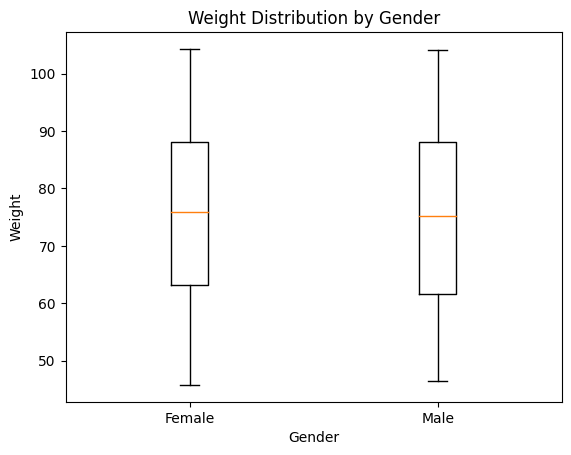

In [ ]:
plt.boxplot([fdata['Actual Weight'],mdata['Actual Weight']])
plt.title('Weight Distribution by Gender')
plt.ylabel('Weight')
plt.xlabel('Gender')
plt.xticks([1, 2], ['Female', 'Male'])

([<matplotlib.axis.XTick at 0x7d716e71c970>,
 [Text(1, 0, 'Female'), Text(2, 0, 'Male')])

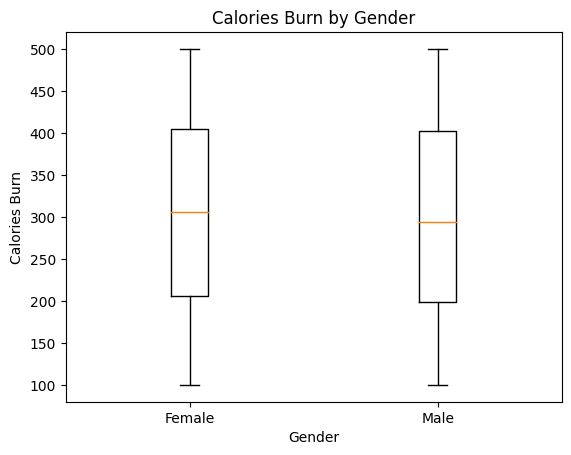

In [ ]:
plt.boxplot([fdata['Calories Burn'],mdata['Calories Burn']])
plt.title('Calories Burn by Gender')
plt.ylabel('Calories Burn')
plt.xlabel('Gender')
plt.xticks([1, 2], ['Female', 'Male'])

Text(0.5, 0, 'Weather Conditions')

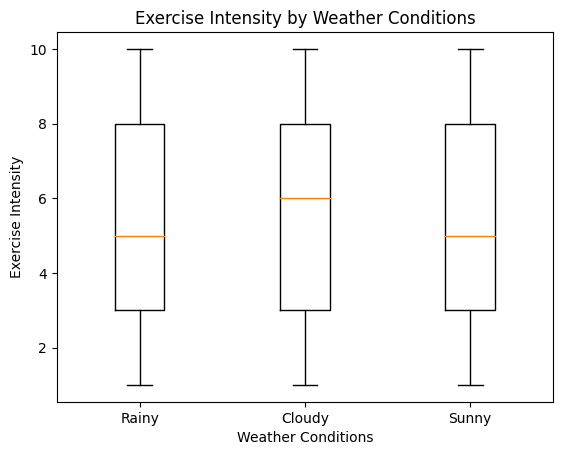

In [ ]:
data2=data.groupby("Weather Conditions")
rainy=data2.get_group("Rainy")
sunny=data2.get_group("Sunny")
cloudy=data2.get_group("Cloudy")


plt.boxplot([rainy['Exercise Intensity'],cloudy['Exercise Intensity'],sunny['Exercise Intensity']])
plt.xticks([1, 2, 3], ['Rainy','Cloudy','Sunny'])
plt.title('Exercise Intensity by Weather Conditions')
plt.ylabel('Exercise Intensity')
plt.xlabel('Weather Conditions')

In [ ]:
data3=data.sort_values(by="Exercise")
plt.plot(uExercise['Exercise'],uExercise['Actual Weight'])
uExercise=data3.unique_values("Exercise")
data3=data3.groupby("Exercise")
for Ex in uExercise:
  E=data3.get_group(Ex)


plt.boxplot([E1['Exercise Intensity'],cloudy['Exercise Intensity'],sunny['Exercise Intensity']])
plt.xticks( ['Exercise 1','Exercise 2','Sunny'])
plt.title('Exercise Intensity by Weather Conditions')
plt.ylabel('Exercise Intensity')
plt.xlabel('Weather Conditions')

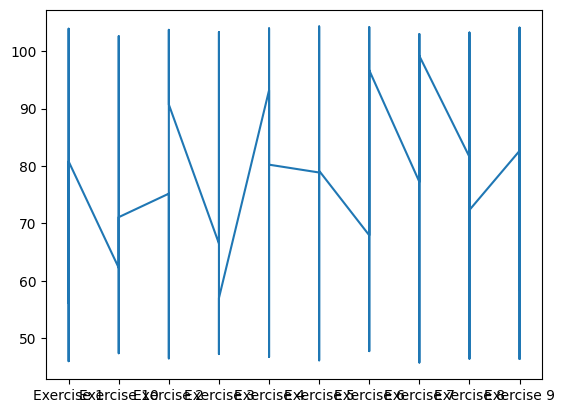

In [ ]:
data2=data.sort_values(by="Exercise")
plt.plot(data2['Exercise'],data2['Actual Weight'])

#Test

In [ ]:
ddata=pd.read_csv("/content/drive/MyDrive/PythonCoolab/datasets/drug+consumption+quantified/drug_consumption.data")
ddata.head()

,1,0.49788,0.48246,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,...,CL0.4,CL0.5,CL0.6,CL0.7,CL0.8,CL0.9,CL0.10,CL2.2,CL0.11,CL0.12
0,2,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,...,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0,CL0
1,3,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,...,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0,CL0
2,4,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,...,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0,CL0
3,5,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,...,CL1,CL0,CL0,CL1,CL0,CL0,CL2,CL2,CL0,CL0
4,6,2.59171,0.48246,-1.22751,0.24923,-0.31685,-0.67825,-0.30033,-1.55521,2.03972,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL6,CL0,CL0


In [ ]:
import pandas as pd

# Definiujemy nagłówki kolumn na podstawie opisu
column_headers = [
    "ID", "Age", "Gender", "Education", "Country", "Ethnicity",
    "Nscore", "Escore", "Oscore", "Ascore", "Cscore",
    "Impulsive", "SS", "Alcohol", "Amphet", "Amyl", "Benzos",
    "Caff", "Cannabis", "Choc", "Coke", "Crack", "Ecstasy",
    "Heroin", "Ketamine", "Legalh", "LSD", "Meth", "Mushrooms",
    "Nicotine", "Semer", "VSA"
]

# Wczytaj dataset (przykład z pliku CSV, ale możesz dostosować do formatu danych)
df = pd.read_csv("/content/drive/MyDrive/PythonCoolab/datasets/drug+consumption+quantified/drug_consumption.data", header=None)  # Brak nagłówków, więc dodamy je ręcznie
df.columns = column_headers  # Ustawiamy nagłówki

# Mapa wartości dla kolumny "Age"
age_map = {
    -0.95197: "18-24",
    -0.07854: "25-34",
     0.49788: "35-44",
     1.09449: "45-54",
     1.82213: "55-64",
     2.59171: "65+"
}

# Mapa wartości dla kolumny "Gender"
gender_map = {
    0.48246: "Female",
   -0.48246: "Male"
}

# Mapa wartości dla kolumny "Education"
education_map = {
   -2.43591: "Left school before 16 years",
   -1.73790: "Left school at 16 years",
   -1.43719: "Left school at 17 years",
   -1.22751: "Left school at 18 years",
   -0.61113: "Some college or university, no certificate or degree",
   -0.05921: "Professional certificate/ diploma",
    0.45468: "University degree",
    1.16365: "Masters degree",
    1.98437: "Doctorate degree"
}

# Mapa wartości dla kolumny "Country"
country_map = {
   -0.09765: "Australia",
    0.24923: "Canada",
   -0.46841: "New Zealand",
   -0.28519: "Other",
    0.21128: "Republic of Ireland",
    0.96082: "UK",
   -0.57009: "USA"
}

# Mapa wartości dla kolumny "Ethnicity"
ethnicity_map = {
   -0.50212: "Asian",
   -1.10702: "Black",
    1.90725: "Mixed-Black/Asian",
    0.12600: "Mixed-White/Asian",
   -0.22166: "Mixed-White/Black",
    0.11440: "Other",
   -0.31685: "White"
}

# Funkcje mapujące dane
df['Age'] = df['Age'].map(age_map)
df['Gender'] = df['Gender'].map(gender_map)
df['Education'] = df['Education'].map(education_map)
df['Country'] = df['Country'].map(country_map)
df['Ethnicity'] = df['Ethnicity'].map(ethnicity_map)

value_maps = {
    'Nscore': {
        16: -3.27393, 18: -3.00537, 19: -2.72827, 20: -2.53830, 21: -2.44904, 22: -2.32338, 23: -2.21069,
        24: -2.11437, 25: -2.03972, 26: -1.92173, 27: -1.76250, 28: -1.63340, 29: -1.50796, 30: -1.37639,
        31: -1.23177, 32: -1.09207, 33: -0.94779, 34: -0.80615, 35: -0.69509, 36: -0.57545, 37: -0.43999,
        38: -0.30033, 39: -0.15487, 40: 0.00332, 41: 0.16767, 42: 0.32197, 43: 0.47617, 44: 0.63779,
        45: 0.80523, 46: 0.96248, 47: 1.11406, 48: 1.28610, 49: 1.45421, 50: 1.58487, 51: 1.74091,
        52: 1.93886, 53: 2.12700, 54: 2.32338, 55: 2.57309, 56: 2.85950, 58: 3.00537, 59: 3.27393
    },
    # Podobne mapowania dla innych kolumn Escore, Oscore, Ascore, Cscore, Impulsive, SS
    'Escore': {
        -3.27393: 16, -2.85950: 18, -2.63365: 19, -2.39883: 20, -2.21069: 21, -2.09015: 22, -1.97495: 23,
        -1.82919: 24, -1.68062: 25, -1.55521: 26, -1.43907: 27, -1.29221: 28, -1.14267: 29, -1.01450: 30,
        -0.89891: 31, -0.78155: 32, -0.66613: 33, -0.56065: 34, -0.46725: 35, -0.34799: 36, -0.24649: 37,
        -0.14882: 38, -0.05188: 39, 0.04257: 40, 0.13606: 41, 0.22393: 42, 0.31287: 43, 0.41667: 44,
        0.52135: 45, 0.62967: 46, 0.73545: 47, 0.82562: 48, 0.91093: 49, 1.02119: 50, 1.13281: 51,
        1.23461: 52, 1.37297: 53, 1.49158: 54, 1.60383: 55, 1.72012: 56, 1.83990: 57, 1.98437: 58,
        2.12700: 59, 2.28554: 60
    },
    'Oscore': {
        -3.27393: 24, -2.85950: 26, -2.63199: 28, -2.39883: 29, -2.21069: 30,
        -2.09015: 31, -1.97495: 32, -1.82919: 33, -1.68062: 34, -1.55521: 35,
        -1.42424: 36, -1.27553: 37, -1.11902: 38, -0.97631: 39, -0.84732: 40,
        -0.71727: 41, -0.58331: 42, -0.45174: 43, -0.31776: 44, -0.17779: 45,
        -0.01928: 46, 0.14143: 47, 0.29338: 48, 0.44585: 49, 0.58331: 50,
        0.72330: 51, 0.88309: 52, 1.06238: 53, 1.24033: 54, 1.43533: 55,
        1.65653: 56, 1.88511: 57, 2.15324: 58, 2.44904: 59, 2.90161: 60
    },
    'Ascore': {
        -3.46436: 12, -3.15735: 16, -3.00537: 18, -2.90161: 23, -2.78793: 24,
        -2.70172: 25, -2.53830: 26, -2.35413: 27, -2.21844: 28, -2.07848: 29,
        -1.92595: 30, -1.77200: 31, -1.62090: 32, -1.47955: 33, -1.34289: 34,
        -1.21213: 35, -1.07533: 36, -0.91699: 37, -0.76096: 38, -0.60633: 39,
        -0.45321: 40, -0.30172: 41, -0.15487: 42, -0.01729: 43, 0.13136: 44,
        0.28783: 45, 0.43852: 46, 0.59042: 47, 0.76096: 48, 1.11406: 49,
        1.28610: 50, 1.45039: 51, 1.61108: 52, 1.81866: 53, 2.03972: 54,
        2.23427: 55, 2.46262: 56, 2.75696: 57, 3.15735: 58, 3.46436: 59
    },
    'Cscore': {
        -3.46436: 17, -3.15735: 19, -2.90161: 20, -2.72827: 21, -2.57309: 22,
        -2.42317: 23, -2.30408: 24, -2.18109: 25, -2.04506: 26, -1.92173: 27,
        -1.78169: 28, -1.64101: 29, -1.51840: 30, -1.38502: 31, -1.25773: 32,
        -1.13788: 33, -1.01450: 34, -0.89891: 35, -0.78155: 36, -0.65253: 37,
        -0.52745: 38, -0.40581: 39, -0.27607: 40, -0.14277: 41, -0.00665: 42,
        0.12331: 43, 0.25953: 44, 0.41594: 45, 0.58489: 46, 0.7583: 47,
        0.93949: 48, 1.13407: 49, 1.30612: 50, 1.46191: 51, 1.63088: 52,
        1.81175: 53, 2.04506: 54, 2.33337: 55, 2.63199: 56, 3.00537: 57,
        3.46436: 58
    },
    'Impulsive': {
        -2.55524: -20, -1.37983: -1, -0.71126: 0, -0.21712: 1,
        0.19268: 2, 0.52975: 3, 0.88113: 4, 1.29221: 5,
        1.86203: 6, 2.90161: 7
    },
    'SS': {
        -2.07848: 1, -1.54858: 2, -1.18084: 3, -0.84637: 4,
        -0.52593: 5, -0.21575: 6, 0.07987: 7, 0.40148: 8,
        0.76540: 9, 1.22470: 10, 1.92173: 11
    }
}

# Funkcja zamieniająca wartości w kolumnie na podstawie mapy
def replace_values(df, column_name, value_map):
    df[column_name] = df[column_name].map(value_map)
    return df

# Zastosuj mapowania dla każdej z kolumn
for column, mapping in value_maps.items():
    df = replace_values(df, column, mapping)

# Mapowanie wartości dla kolumn od 14 do 32 (CL0-CL6)
class_mapping = {
    'CL0': "Never Used",
    'CL1': "Used over a Decade Ago",
    'CL2': "Used in Last Decade",
    'CL3': "Used in Last Year",
    'CL4': "Used in Last Month",
    'CL5': "Used in Last Week",
    'CL6': "Used in Last Day"
}

# Zamień wartości CL0-CL6 dla kolumn od 14 do 32
columns_with_classes = df.columns[13:32]  # Zakładam, że kolumny są odpowiednio nazwane i w odpowiednich indeksach
df[columns_with_classes] = df[columns_with_classes].replace(class_mapping)



# Zapisujemy zmodyfikowany dataset
df.to_csv("processed_dataset.csv", index=False)

print("Dane zostały pomyślnie przetworzone.")

Dane zostały pomyślnie przetworzone.


#Task 2.2


Biases and Assumptions:

-Longer flight will be more expensive

-Business flights will be more expensive than
Economical one

-Business flights will be faster than economical one, but they also will flew longer distances.

-There will be more economical flights


#Task 2.3

##Related work:
- Flight Fare Prediction | 10 ML Models
- AirLinePrice-Regression
-



#Task 2.5

In [ ]:
import pandas as pd

data=pd.read_csv("/content/PythonForMachineLearning/datasets/Clean_Dataset.csv")
data.head()


#Task 2.6

In [ ]:
time=data['departure_time'].unique()
print(time)

['Evening' 'Early_Morning' 'Morning' 'Afternoon' 'Night' 'Late_Night']


In [ ]:
from time import time
from sklearn.model_selection import train_test_split
stops_mapping = {
    'zero': 0,
    'one': 1,
    'two_or_more': 2
}



time_mapping = {
    'Early_Morning': 0,
    'Morning': 1,
    'Afternoon': 2,
    'Evening': 3,
    'Night': 4,
    'Late_Night': 5
}

data['stops'] = data['stops'].map(stops_mapping)
data['departure_time'] = data['departure_time'].map(time_mapping)
data['arrival_time'] = data['arrival_time'].map(time_mapping)


X=data.drop(["duration","Unnamed: 0","flight","days_left"],axis=1)
y=data["duration"]
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.3,random_state=1 )
X_train.head()


,airline,source_city,departure_time,stops,arrival_time,destination_city,class,price
107174,AirAsia,Bangalore,4,0,5,Kolkata,Economy,3393
183692,GO_FIRST,Chennai,0,1,2,Delhi,Economy,4827
208304,Vistara,Delhi,2,0,3,Mumbai,Business,34472
116440,Vistara,Bangalore,4,1,1,Chennai,Economy,9420
65996,Air_India,Mumbai,0,1,1,Kolkata,Economy,6105


In [ ]:
y_train.head()

,duration
107174,2.42
183692,7.17
208304,2.17
116440,11.17
65996,24.08


#Task 2.7

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

data1=X_train["airline"].sort_values()
uAirline=data1.unique()
print(uAirline)


['AirAsia' 'Air_India' 'GO_FIRST' 'Indigo' 'SpiceJet' 'Vistara']


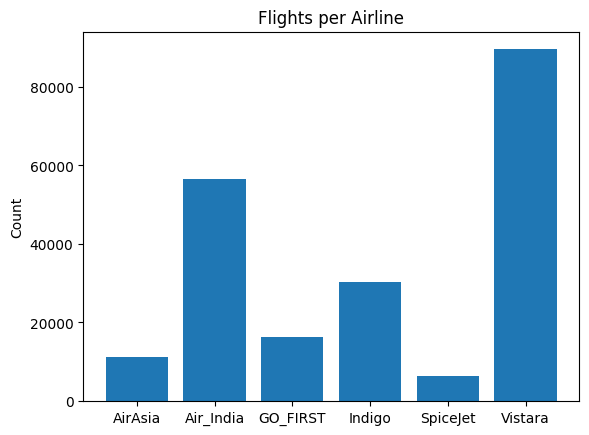

In [ ]:
import matplotlib.pyplot as plt
from collections import Counter

cAirlines=Counter(data1)

name_list = list(cAirlines.keys())
count_list = list(cAirlines.values())
plt.bar(name_list,count_list)
plt.title('Flights per Airline')
plt.ylabel('Count')
plt.show()

In [ ]:
data2=X_train["class"].sort_values()

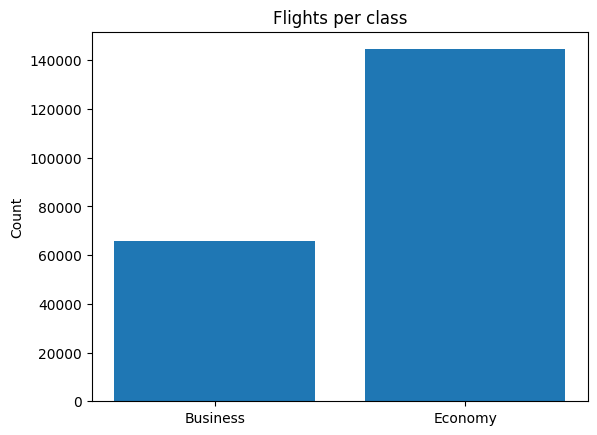

In [ ]:
clas=Counter(data2)
name_list = list(clas.keys())
count_list = list(clas.values())
plt.bar(name_list,count_list)
plt.title('Flights per class')
plt.ylabel('Count')
plt.show()

In [ ]:
data3=X_train["stops"].sort_values()

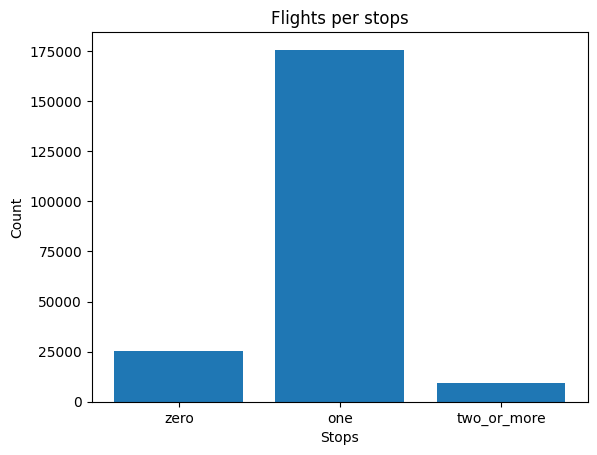

In [ ]:
stops=Counter(data3)
name_list = list(stops.keys())
count_list = list(stops.values())
plt.bar(name_list,count_list)
plt.title('Flights per stops')
plt.ylabel('Count')
plt.xlabel('Stops')
plt.xticks([0,1,2],['zero','one','two_or_more'])
plt.show()

In [ ]:
data4=X_train["departure_time"].sort_values()

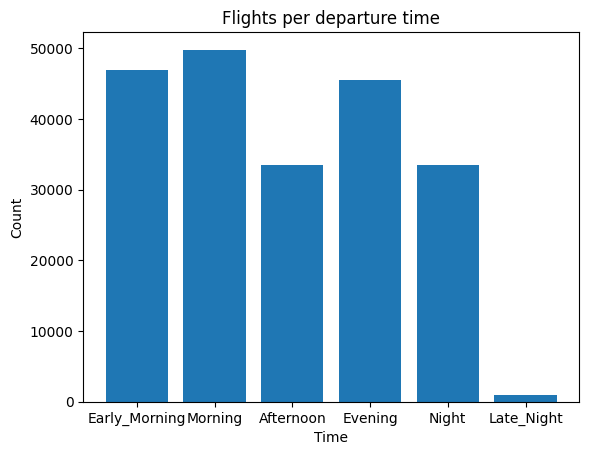

In [ ]:
cnt=Counter(data4)
name_list = list(cnt.keys())
count_list = list(cnt.values())
plt.bar(name_list,count_list)
plt.title('Flights per departure time')
plt.ylabel('Count')
plt.xlabel('Time')
plt.xticks([0,1,2,3,4,5],['Early_Morning','Morning','Afternoon', 'Evening','Night','Late_Night'])
plt.show()

In [ ]:
data5=X_train["arrival_time"].sort_values()

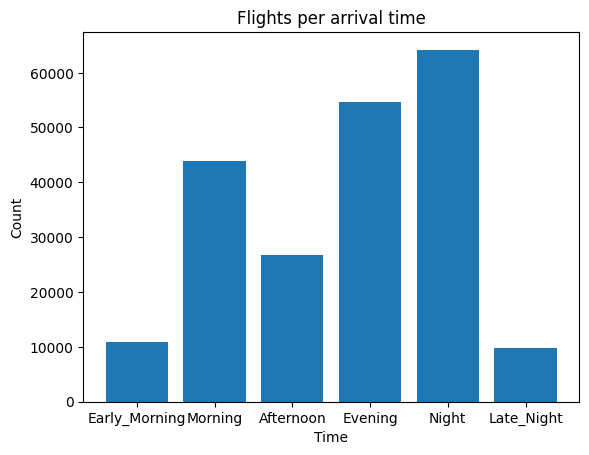

In [ ]:
cnt=Counter(data5)
name_list = list(cnt.keys())
count_list = list(cnt.values())
plt.bar(name_list,count_list)
plt.title('Flights per arrival time')
plt.ylabel('Count')
plt.xlabel('Time')
plt.xticks([0,1,2,3,4,5],['Early_Morning','Morning','Afternoon', 'Evening','Night','Late_Night'])
plt.show()

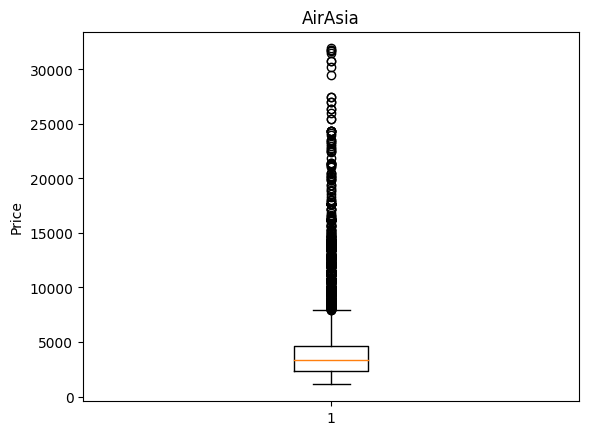

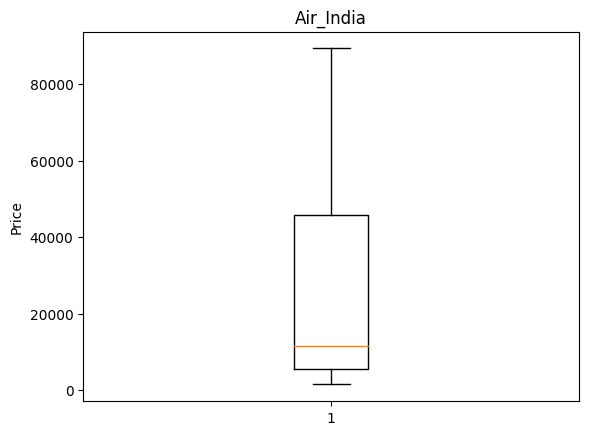

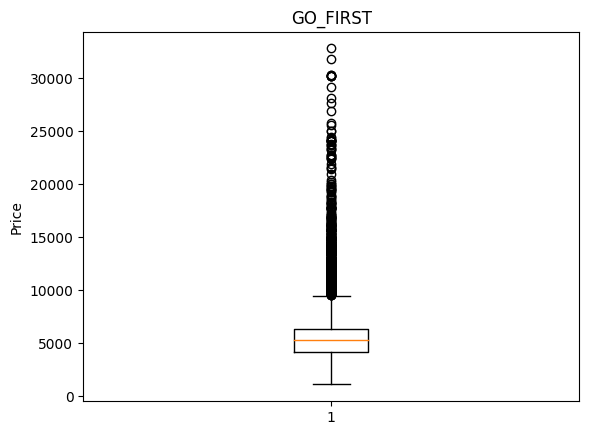

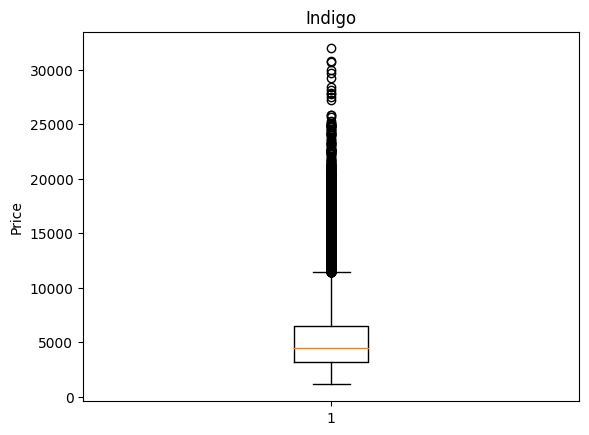

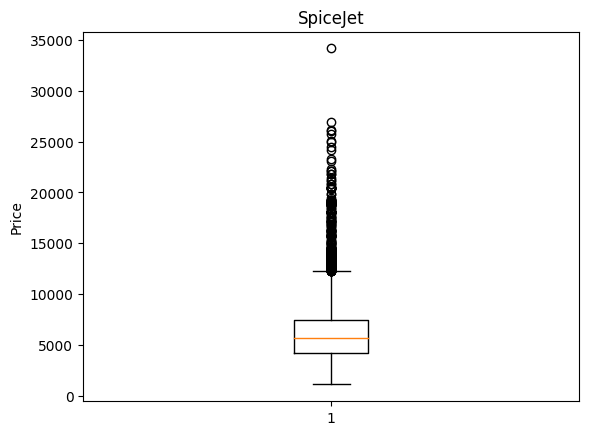

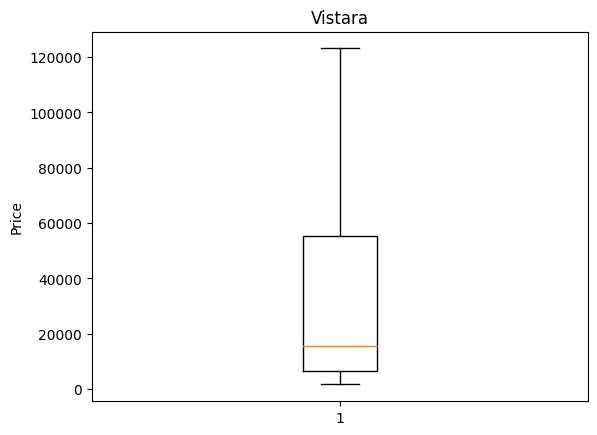

In [ ]:
data6=X_train.groupby("airline")
air={}
for i in uAirline:
  plt.boxplot(data6.get_group(i)['price'])
  plt.title(i)
  plt.ylabel('Price')
  plt.show()




Text(120.72222222222221, 0.5, 'Source City')

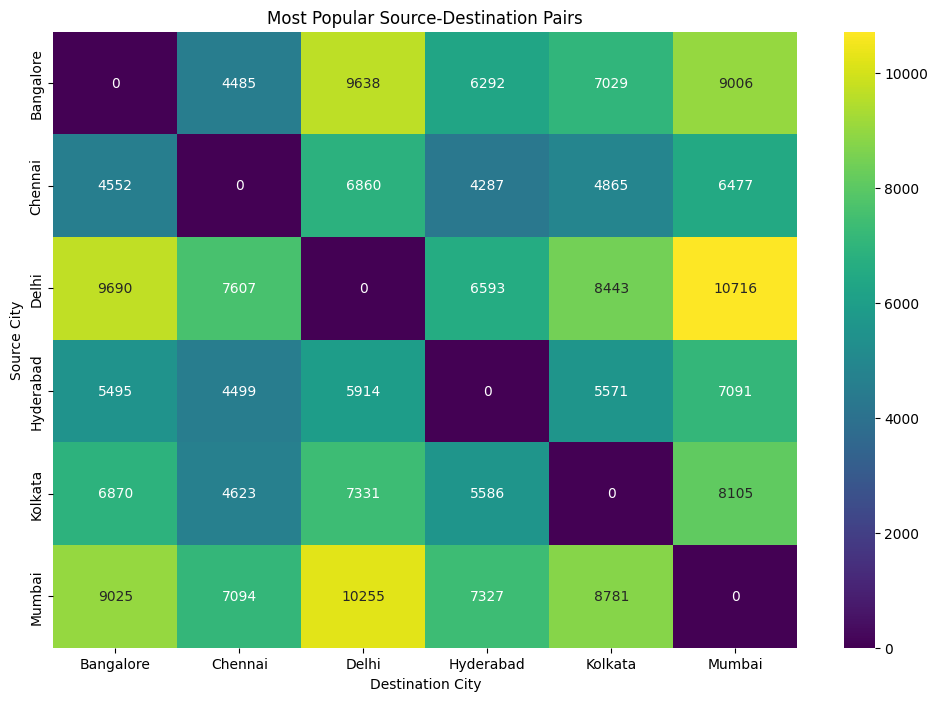

In [ ]:
city_pairs = pd.crosstab(X_train['source_city'], X_train['destination_city'])
plt.figure(figsize=(12, 8))
sns.heatmap(city_pairs,cmap="viridis",annot=True, fmt="d")
plt.title("Most Popular Source-Destination Pairs")
plt.xlabel("Destination City")
plt.ylabel("Source City")

([<matplotlib.axis.YTick at 0x7ccfc7344e50>,
 [Text(0, 0, 'Early_Morning'),
  Text(0, 1, 'Morning'),
  Text(0, 2, 'Afternoon'),
  Text(0, 3, 'Evening'),
  Text(0, 4, 'Night'),
  Text(0, 5, 'Late_Night')])

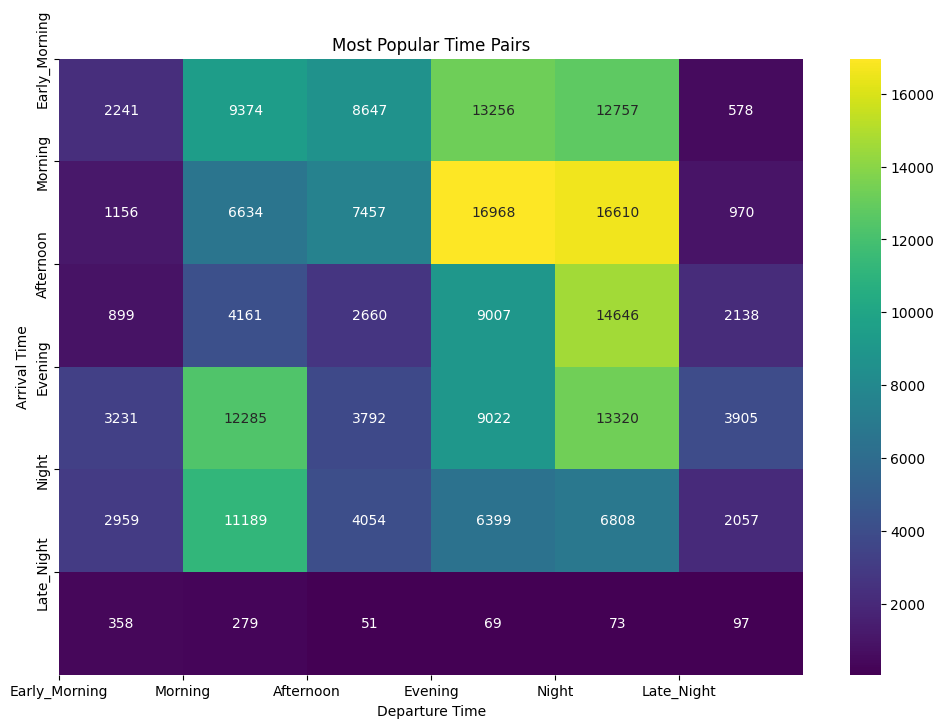

In [ ]:
time_pairs = pd.crosstab(X_train['departure_time'], X_train['arrival_time'])
plt.figure(figsize=(12, 8))
sns.heatmap(time_pairs,cmap="viridis",annot=True, fmt="d")
plt.title("Most Popular Time Pairs")
plt.xlabel("Departure Time")
plt.ylabel("Arrival Time")
plt.xticks([0,1,2,3,4,5],['Early_Morning','Morning','Afternoon', 'Evening','Night','Late_Night'])
plt.yticks([0,1,2,3,4,5],['Early_Morning','Morning','Afternoon', 'Evening','Night','Late_Night'])

#Task 2.8

We chosen dataset for Flight Price Prediction

https://www.kaggle.com/datasets/shubhambathwal/flight-price-prediction

We want to know how to predict duration of a flight, based on features like place of origin, airline,	departure time, stops,	destination city,	class, price.

Questions:

  - Does duration changes if flight starts during the day or at night.
  -
